In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [56]:
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))
allSubjDirs = glob.glob(dataDir + os.sep + 'mcvfp*')
print allSubjDirs
subjDir = allSubjDirs[0] # this will eventually go through a loop
print subjDir
subjFilePath = glob.glob(subjDir + os.sep + 'mcvfp*.csv')[0]
print subjFilePath
ds = pd.read_csv(subjFilePath)
print ds.head(5)
print ds.columns

['/Users/egor/Dropbox/Projects/mc/data/mcvfp_p1_s1_2016-09-27_1819']
/Users/egor/Dropbox/Projects/mc/data/mcvfp_p1_s1_2016-09-27_1819
/Users/egor/Dropbox/Projects/mc/data/mcvfp_p1_s1_2016-09-27_1819/mcvfp_p1_s1_2016-09-27_1819.csv
  expName             time  participant  session  trialN  dirL  dirR   vL  \
0   mcvfp  2016-09-27_1819            1        1       1     0   180  0.3   
1   mcvfp  2016-09-27_1819            1        1       2   180     0  0.0   
2   mcvfp  2016-09-27_1819            1        1       3     0   180  0.6   
3   mcvfp  2016-09-27_1819            1        1       4     0   180  2.4   
4   mcvfp  2016-09-27_1819            1        1       5     0   180  4.8   

    vR  szL   ...    nNa  nf000  nf090  nf180  nf270     pd000  pd090  \
0  2.4  256   ...    165     23      0     52      0  0.095833      0   
1  1.2  256   ...     53    169      0      0     18  0.704167      0   
2  0.3  256   ...     41     68      0    131      0  0.283333      0   
3  0.0  256   

For each participant, plotting the number of left/right/up/down responses throughout the trial. Transforming the data set first.

In [80]:
ds['colorNameL'] = 'red'
ds.ix[ds['colorL']=='[-1, -1, 1]','colorNameL'] = 'blue'
ds['colorNameR'] = 'red'
ds.ix[ds['colorR']=='[-1, -1, 1]','colorNameR'] = 'blue'
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['pdR'] = ds['pd000'] - ds['pd180']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

  expName             time  participant  session  trialN  dirL  dirR   vL  \
0   mcvfp  2016-09-27_1819            1        1       1     0   180  0.3   
1   mcvfp  2016-09-27_1819            1        1       2   180     0  0.0   
2   mcvfp  2016-09-27_1819            1        1       3     0   180  0.6   
3   mcvfp  2016-09-27_1819            1        1       4     0   180  2.4   
4   mcvfp  2016-09-27_1819            1        1       5     0   180  4.8   

    vR  szL  ...      pd180     pd270  qnResp  colorNameL  colorNameR  vDiffR  \
0  2.4  256  ...   0.216667  0.000000       0        blue         red     2.1   
1  1.2  256  ...   0.000000  0.075000       0         red        blue     1.2   
2  0.3  256  ...   0.545833  0.000000       0         red        blue    -0.3   
3  0.0  256  ...   0.508333  0.054167       0        blue         red    -2.4   
4  1.2  256  ...   0.658333  0.000000       0        blue         red    -3.6   

        pdR  nfR v000  v180  
0 -0.120833  -29  0.

The first plot shows simply the trend overall: as the speed keeps increasing toward the right, what happens to the predominance of the right stimulus. The predominance is quantified simply as the number of frames marked as Right-dominant minus Left-dominant.

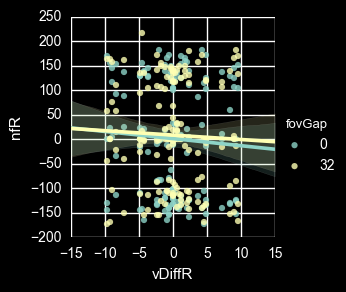

In [96]:
%matplotlib inline
plt.style.use('dark_background')
ax = sns.lmplot(x='vDiffR', y='nfR', hue='fovGap', data=ds, size=3)
#plt.figure(figsize=(3,2))
#plt.legend(loc='upper right')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The next plot shows the two directions separately. The question is, what is the predominance given the increase of the velocity to the right? And to the left?

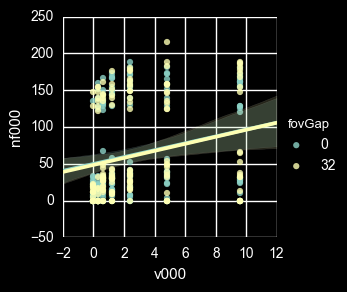

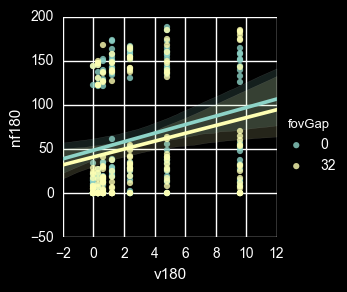

In [97]:
ax = sns.lmplot(x='v000', y='nf000', hue='fovGap', data=ds, size=3)
plt.show()
ax = sns.lmplot(x='v180', y='nf180', hue='fovGap', data=ds, size=3)
plt.show()